# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [502]:
import pandas as pd
import numpy as np
data = pd.read_csv('./file1.csv')
data.rename(columns=str.lower, inplace=True)
data.rename(columns={'customer lifetime value':'customer_lifetime_value','monthly premium auto':'monthly_premium_auto',"number of open complaints":'number_of_open_complaints','policy type':'policy_type','vehicle class':'vehicle_class','total claim amount':'total_claim_amount'}, inplace=True)
data.rename(columns={'st':'state'}, inplace=True)
data

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,305955.03%,38644,78.0,1/1/00,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,Cali,F,High School or Below,2031499.76%,63209,102.0,1/2/00,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,323912.47%,16061,88.0,1/0/00,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11%,79487,114.0,1/0/00,Special Auto,SUV,547.200000


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [503]:
data['state'] = data['state'].replace('Cali','California')
data['state'] = data['state'].replace('AZ','Arizona')
data['state'] = data['state'].replace('WA','Washington')
data['education'] = data['education'].replace('Bachelors','Bachelor')
data['gender'].unique()
data['gender'] = data['gender'].replace('Femal','F')
data['gender'] = data['gender'].replace('Male','M')
data['gender'] = data['gender'].replace('female','F')
data['gender'].unique()
data['vehicle_class'] = data['vehicle_class'].replace('Sports Car','Luxury')
data['vehicle_class'] = data['vehicle_class'].replace('Luxury SUV','Luxury')
data['vehicle_class'] = data['vehicle_class'].replace('Luxury Car','Luxury')
data['vehicle_class'].unique()

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury'], dtype=object)

In [504]:
x_col = pd.read_csv('./file1.csv')#i made a mistake later on and i have to reupload the column :)
data['customer_lifetime_value'] = x_col['Customer Lifetime Value']
data['customer_lifetime_value'] = data['customer_lifetime_value'].str.rstrip('%')
data['customer_lifetime_value'].head(20)

0            NaN
1      697953.59
2     1288743.17
3      764586.18
4      536307.65
5      825629.78
6      538089.86
7      721610.03
8     2412750.40
9      738817.81
10     473899.20
11     819719.71
12     879879.70
13     881901.89
14     538443.17
15     746313.94
16     256686.78
17     394524.16
18     571033.31
19     816261.71
Name: customer_lifetime_value, dtype: object

In [505]:
data['customer_lifetime_value'] = pd.to_numeric(data['customer_lifetime_value'], errors='coerce')
data['customer_lifetime_value']

0              NaN
1        697953.59
2       1288743.17
3        764586.18
4        536307.65
           ...    
1066     305955.03
1067    2031499.76
1068     323912.47
1069     462680.11
1070     899704.02
Name: customer_lifetime_value, Length: 1071, dtype: float64

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [506]:
data.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                         int64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [507]:
data['number_of_open_complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00'],
      dtype=object)

In [508]:
data[['col1','col2','col3']] = data['number_of_open_complaints'].str.split('/', expand=True)
data

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount,col1,col2,col3
0,RB50392,Washington,NaN,Master,NaN,0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934,1,0,00
1,QZ44356,Arizona,F,Bachelor,697953.59,0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935,1,0,00
2,AI49188,Nevada,F,Bachelor,1288743.17,48767,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247,1,0,00
3,WW63253,California,M,Bachelor,764586.18,0,106.0,1/0/00,Corporate Auto,SUV,529.881344,1,0,00
4,GA49547,Washington,M,High School or Below,536307.65,36357,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323,1,0,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,305955.03,38644,78.0,1/1/00,Personal Auto,Four-Door Car,361.455219,1,1,00
1067,VJ51327,California,F,High School or Below,2031499.76,63209,102.0,1/2/00,Personal Auto,SUV,207.320041,1,2,00
1068,GS98873,Arizona,F,Bachelor,323912.47,16061,88.0,1/0/00,Personal Auto,Four-Door Car,633.600000,1,0,00
1069,CW49887,California,F,Master,462680.11,79487,114.0,1/0/00,Special Auto,SUV,547.200000,1,0,00


In [509]:
data['number_of_open_complaints'] = data['col2'].astype(int)
data['number_of_open_complaints']

0       0
1       0
2       0
3       0
4       0
       ..
1066    1
1067    2
1068    0
1069    0
1070    0
Name: number_of_open_complaints, Length: 1071, dtype: int32

In [510]:
data.drop(columns=['col1', 'col2', 'col3'], inplace=True)
data
#i checked that there is a helpful "del" function

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,305955.03,38644,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,2031499.76,63209,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,323912.47,16061,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11,79487,114.0,0,Special Auto,SUV,547.200000


## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [511]:
data.dropna(how='all', inplace=True)

In [512]:
data['state'].unique()
print(data['gender'].unique())
print(data['gender'].isna().sum())

[nan 'F' 'M']
117


In [513]:
data['gender'].fillna("NG", inplace=True)
print(data['gender'].unique())

['NG' 'F' 'M']


In [514]:
data['education'].unique()
data['customer_lifetime_value'].isna().sum()

3

In [515]:
data['customer_lifetime_value'].fillna(data['customer_lifetime_value'].mean(), inplace=True)
data['customer_lifetime_value'].isna().sum()

0

In [516]:
data['policy_type'].isna().sum()
data['vehicle_class'].isna().sum()
data['total_claim_amount'].isna().sum()
data['number_of_open_complaints'].isna().sum()
data['monthly_premium_auto'].isna().sum()
data['income'].isna().sum()
data.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                         int64
monthly_premium_auto         float64
number_of_open_complaints      int32
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [517]:
duplicated_data = data[data.duplicated(keep=False)]
print(duplicated_data)
#i don't know how i can have no duplicates. Maybe as i drop all the full null rows.
data.drop_duplicates()

Empty DataFrame
Columns: [customer, state, gender, education, customer_lifetime_value, income, monthly_premium_auto, number_of_open_complaints, policy_type, vehicle_class, total_claim_amount]
Index: []


,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NG,Master,7.936903e+05,0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6.979536e+05,0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1.288743e+06,48767,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7.645862e+05,0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5.363077e+05,36357,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3.059550e+05,38644,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,2.031500e+06,63209,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3.239125e+05,16061,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4.626801e+05,79487,114.0,0,Special Auto,SUV,547.200000


# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [518]:
#Not a valid answer. I still have to do this bonus!
#data['state'].unique()
#def clean(x):
#    x = x.upper()
#    x = x.strip()
#    if x in ['AZ', 'ARIZONA']:
#        return 'AZ'
#    elif x in ['CA', 'CALIFORNIA', 'CALI']:
#        return 'CA'
#    elif x in ['TN', 'TENNESSEE']:
#        return 'TN'
#    else:
#        return x

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [519]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1071.0,793690.259345,642575.704559,200435.070000,404853.460000,588718.200000,894520.995,5.816655e+06
income,1071.0,39295.701214,30469.427060,0.000000,14072.000000,36234.000000,64631.000,9.996000e+04
monthly_premium_auto,1071.0,193.234360,1601.190369,61.000000,68.000000,83.000000,109.500,3.535400e+04
number_of_open_complaints,1071.0,0.394024,0.883769,0.000000,0.000000,0.000000,0.000,5.000000e+00
total_claim_amount,1071.0,404.986909,293.027260,0.382107,202.157702,354.729129,532.800,2.893240e+03


In [520]:
summary = data.describe().T
summary['iqr'] = summary['75%']-summary['25%']

summary['range'] = summary['max']-summary['min']
summary

,count,mean,std,min,25%,50%,75%,max,iqr,range
customer_lifetime_value,1071.0,793690.259345,642575.704559,200435.070000,404853.460000,588718.200000,894520.995,5.816655e+06,489667.535000,5.616220e+06
income,1071.0,39295.701214,30469.427060,0.000000,14072.000000,36234.000000,64631.000,9.996000e+04,50559.000000,9.996000e+04
monthly_premium_auto,1071.0,193.234360,1601.190369,61.000000,68.000000,83.000000,109.500,3.535400e+04,41.500000,3.529300e+04
number_of_open_complaints,1071.0,0.394024,0.883769,0.000000,0.000000,0.000000,0.000,5.000000e+00,0.000000,5.000000e+00
total_claim_amount,1071.0,404.986909,293.027260,0.382107,202.157702,354.729129,532.800,2.893240e+03,330.642298,2.892858e+03


In [521]:
for col in summary.columns:
    summary[col] = summary[col].apply(lambda x : round(x, 2))
summary

,count,mean,std,min,25%,50%,75%,max,iqr,range
customer_lifetime_value,1071.0,793690.26,642575.70,200435.07,404853.46,588718.20,894520.99,5816655.35,489667.54,5616220.28
income,1071.0,39295.70,30469.43,0.00,14072.00,36234.00,64631.00,99960.00,50559.00,99960.00
monthly_premium_auto,1071.0,193.23,1601.19,61.00,68.00,83.00,109.50,35354.00,41.50,35293.00
number_of_open_complaints,1071.0,0.39,0.88,0.00,0.00,0.00,0.00,5.00,0.00,5.00
total_claim_amount,1071.0,404.99,293.03,0.38,202.16,354.73,532.80,2893.24,330.64,2892.86


In [522]:
TCA_top25 = data['total_claim_amount'].quantile(q=0.75)
CLV_bottom25 = data['customer_lifetime_value'].quantile(q=0.25)
#'m trying to use combining filters and defining a quantile variable 
targetcustomer = data[(data['total_claim_amount']>=TCA_top25) & (data['customer_lifetime_value']<=CLV_bottom25) ] # good to remember that & = AND, | = OR
targetcustomer

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
17,OE15005,California,NG,College,394524.16,28855,101.0,0,Personal Auto,SUV,647.442031
23,TZ98966,Nevada,NG,Bachelor,245019.10,0,73.0,3,Corporate Auto,Four-Door Car,554.376763
26,US89481,California,NG,Bachelor,394637.21,0,111.0,0,Personal Auto,Four-Door Car,799.200000
38,CM61827,Oregon,NG,Bachelor,309003.41,0,90.0,0,Personal Auto,Two-Door Car,648.000000
42,IL19217,California,NG,Bachelor,393900.64,60021,99.0,0,Personal Auto,Four-Door Car,882.871945
62,FG63582,Oregon,NG,Bachelor,333976.49,0,94.0,0,Personal Auto,Two-Door Car,863.327324
135,MS41162,Arizona,NG,High School or Below,402296.35,0,117.0,0,Personal Auto,SUV,975.107098
140,DS81757,Oregon,M,College,247012.12,0,74.0,0,Personal Auto,Two-Door Car,721.242206
158,KA61892,Arizona,M,College,387364.70,28142,105.0,0,Personal Auto,Luxury,701.708239
160,ND87334,California,M,High School or Below,228759.69,0,63.0,0,Corporate Auto,Two-Door Car,679.368378


In [523]:
targetcustomer.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,41.0,340056.269512,57043.699118,228759.69,289873.270000,365253.240000,387364.7,402381.440000
income,41.0,16132.097561,23708.735202,0.00,0.000000,0.000000,28142.0,92600.000000
monthly_premium_auto,41.0,93.024390,16.142317,63.00,80.000000,97.000000,105.0,117.000000
number_of_open_complaints,41.0,0.536585,1.206183,0.00,0.000000,0.000000,0.0,5.000000
total_claim_amount,41.0,719.118612,150.389974,532.80,632.715382,679.368378,799.2,1185.988301


In [524]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   1071 non-null   object 
 1   state                      1071 non-null   object 
 2   gender                     1071 non-null   object 
 3   education                  1071 non-null   object 
 4   customer_lifetime_value    1071 non-null   float64
 5   income                     1071 non-null   int64  
 6   monthly_premium_auto       1071 non-null   float64
 7   number_of_open_complaints  1071 non-null   int32  
 8   policy_type                1071 non-null   object 
 9   vehicle_class              1071 non-null   object 
 10  total_claim_amount         1071 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 88.0+ KB


In [525]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1071.0,793690.259345,642575.704559,200435.070000,404853.460000,588718.200000,894520.995,5.816655e+06
income,1071.0,39295.701214,30469.427060,0.000000,14072.000000,36234.000000,64631.000,9.996000e+04
monthly_premium_auto,1071.0,193.234360,1601.190369,61.000000,68.000000,83.000000,109.500,3.535400e+04
number_of_open_complaints,1071.0,0.394024,0.883769,0.000000,0.000000,0.000000,0.000,5.000000e+00
total_claim_amount,1071.0,404.986909,293.027260,0.382107,202.157702,354.729129,532.800,2.893240e+03


In [526]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='gender', ylabel='count'>

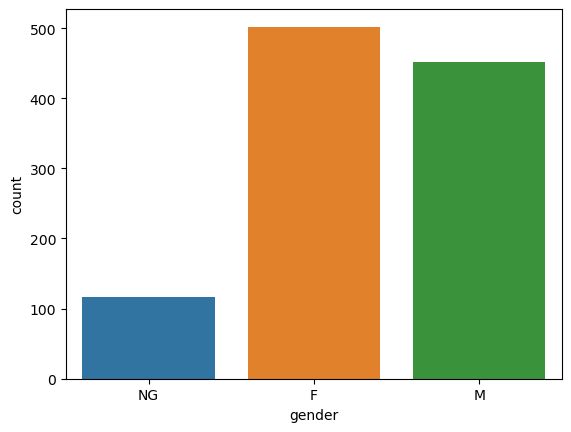

In [527]:
sns.countplot(x='gender', data=data)

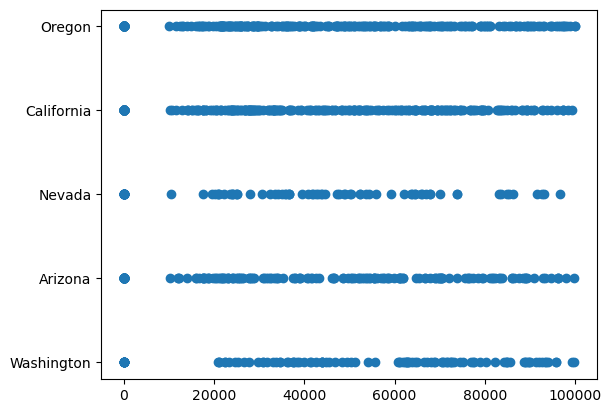

In [528]:
plt.scatter(x=data['income'], y=data['state'])
plt.show()

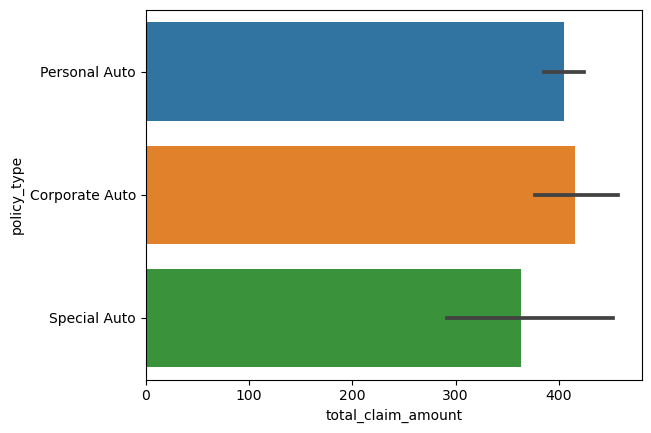

In [529]:
sns.barplot(x=data['total_claim_amount'], y=data['policy_type'], data=data)
plt.show()

In [530]:
data.groupby('vehicle_class')['education'].value_counts()
#sns.barplot(x=data['education'], y=data['vehicle_class'], data=data)
#plt.show()

vehicle_class  education           
Four-Door Car  Bachelor                188
               College                 173
               High School or Below    147
               Master                   49
               Doctor                   19
Luxury         High School or Below     32
               Bachelor                 25
               College                  23
               Master                    7
               Doctor                    4
SUV            College                  64
               High School or Below     54
               Bachelor                 54
               Master                   19
               Doctor                    8
Two-Door Car   Bachelor                 64
               High School or Below     63
               College                  53
               Master                   19
               Doctor                    6
Name: count, dtype: int64

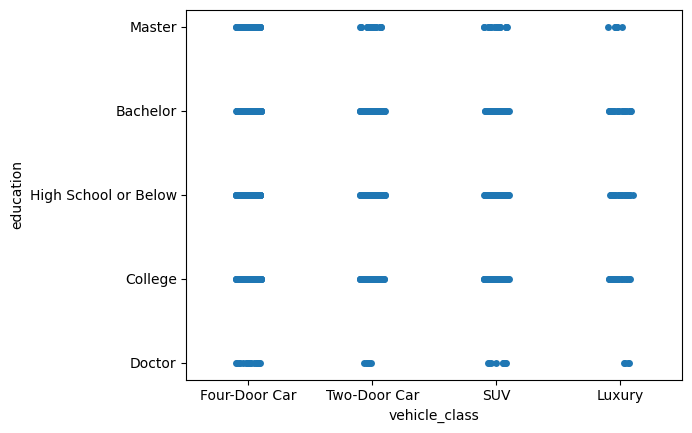

In [531]:
sns.stripplot(x='vehicle_class',y='education',data=data)
plt.show()
#i tried all the plots of seaborn for categorical data but few give relevant output, specially if a consider the table above.

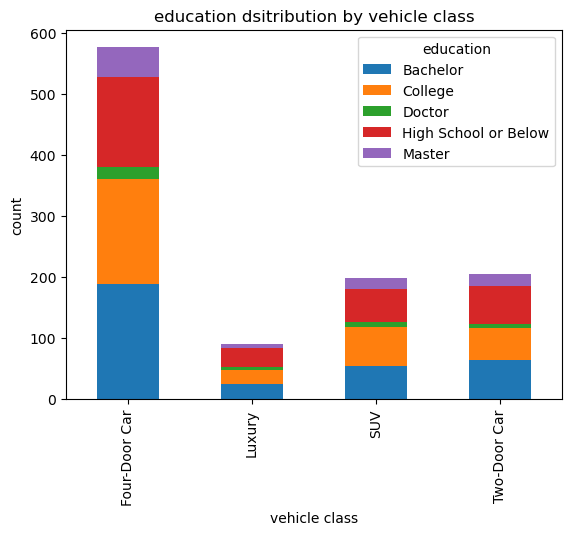

In [532]:
data.groupby('vehicle_class')['education'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('vehicle class')
plt.ylabel('count')
plt.title('education dsitribution by vehicle class')
plt.show()
#i explained my problem to chat gpt i ended up with this fantastic solution that shows actually what i think is relevant for this case.
#accordingly i can conclude that luxury cars are mostly bught but ppl with few levels of education.

In [533]:
#most of our data come from females - and we have an important amount of non define gender and we may check if there is any problem in the survey
#the distribution of each state have serious outliers distribution tend to be very even, but in washington is possible to segment in two mayor groups
#corporate auto policy customers tend to have higher claim amounts
#as i said before clients with the higher degree of education prefer four-door cars and not prefer luxury on the other hand the best luxury car consumers tend to have the lowest level of education


In [534]:
data #1071 rows × 11 columns
iqr_clv = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
np.percentile(data['customer_lifetime_value'],75)
upper_limit_clv = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr_clv
lower_limit_clv = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr_clv
data = data[(data['customer_lifetime_value']>lower_limit_clv) & (data['customer_lifetime_value']<upper_limit_clv)]
iqr_mpa = np.percentile(data['monthly_premium_auto'],75) - np.percentile(data['monthly_premium_auto'],25)
upper_limit_mpa = np.percentile(data['monthly_premium_auto'],75) + 1.5*iqr_mpa
lower_limit_mpa = np.percentile(data['monthly_premium_auto'],25) - 1.5*iqr_mpa
data = data[(data['monthly_premium_auto']>lower_limit_mpa) & (data['monthly_premium_auto']<upper_limit_mpa)]
data #934 rows × 11 columns

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,QZ44356,Arizona,F,Bachelor,697953.59,0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,825629.78,62902,69.0,0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
1065,XD85577,California,M,Bachelor,284226.69,69417,73.0,1,Personal Auto,Four-Door Car,30.874869
1066,TM65736,Oregon,M,Master,305955.03,38644,78.0,1,Personal Auto,Four-Door Car,361.455219
1068,GS98873,Arizona,F,Bachelor,323912.47,16061,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11,79487,114.0,0,Special Auto,SUV,547.200000


In [535]:
categorical_value = data.loc[:,['state','education','gender','policy_type','vehicle_class']]
categorical_value
numerical_value = data.loc[:,['customer_lifetime_value','income','monthly_premium_auto','number_of_open_complaints','total_claim_amount']]
numerical_value
#to refresh the old method

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
1,697953.59,0,94.0,0,1131.464935
2,1288743.17,48767,108.0,0,566.472247
3,764586.18,0,106.0,0,529.881344
4,536307.65,36357,68.0,0,17.269323
5,825629.78,62902,69.0,0,159.383042
...,...,...,...,...,...
1065,284226.69,69417,73.0,1,30.874869
1066,305955.03,38644,78.0,1,361.455219
1068,323912.47,16061,88.0,0,633.600000
1069,462680.11,79487,114.0,0,547.200000


In [536]:
numerical_value = data.select_dtypes(include=np.number)
categorical_value = data.select_dtypes(include='object')

<Axes: >

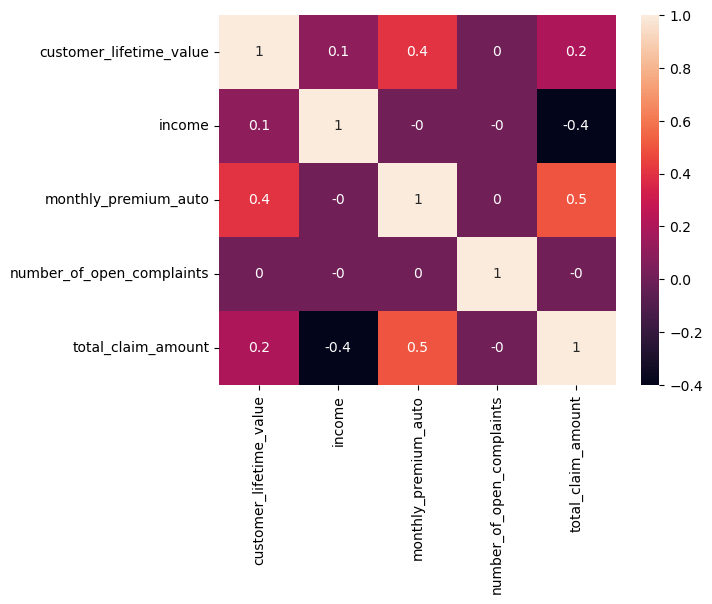

In [537]:
sns.heatmap(numerical_value.corr().round(1), annot=True)

In [538]:
categorical_value = categorical_value.drop(['customer'], axis=1)
#df.drop(['A'], axis=1) & df.drop(columns =['C', 'D']) sorry i always forget how to drop

In [539]:
categorical_value

,state,gender,education,policy_type,vehicle_class
1,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,California,M,Bachelor,Corporate Auto,SUV
4,Washington,M,High School or Below,Personal Auto,Four-Door Car
5,Oregon,F,Bachelor,Personal Auto,Two-Door Car
...,...,...,...,...,...
1065,California,M,Bachelor,Personal Auto,Four-Door Car
1066,Oregon,M,Master,Personal Auto,Four-Door Car
1068,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1069,California,F,Master,Special Auto,SUV


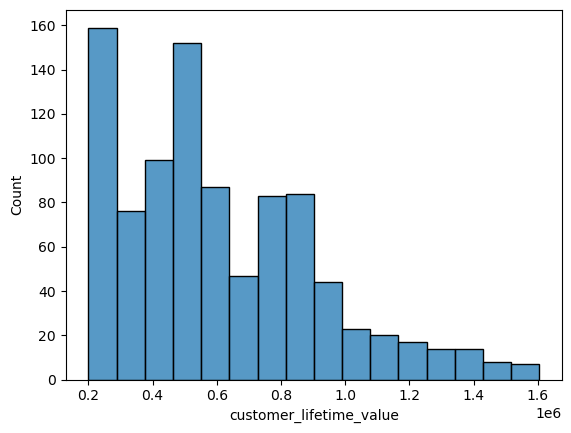

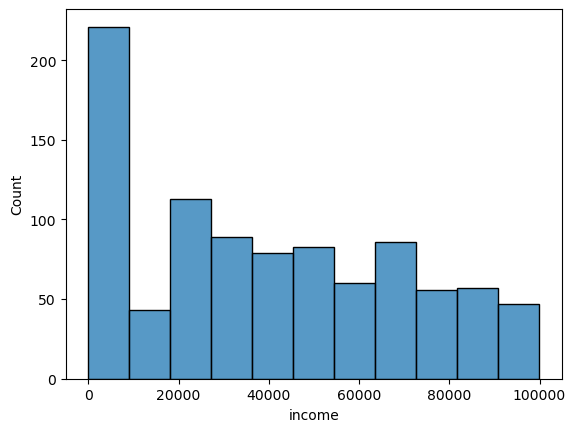

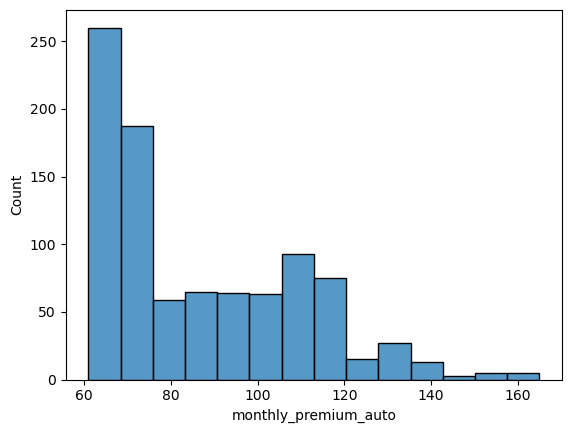

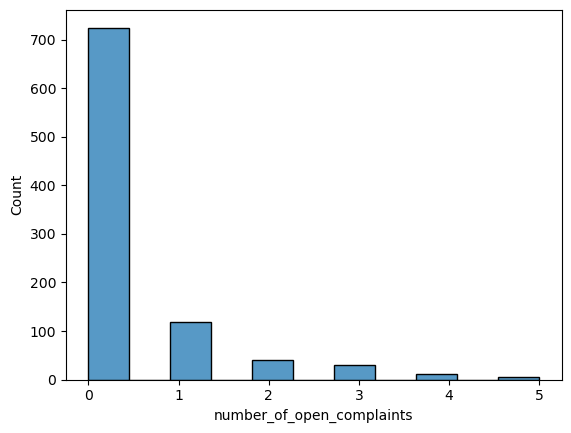

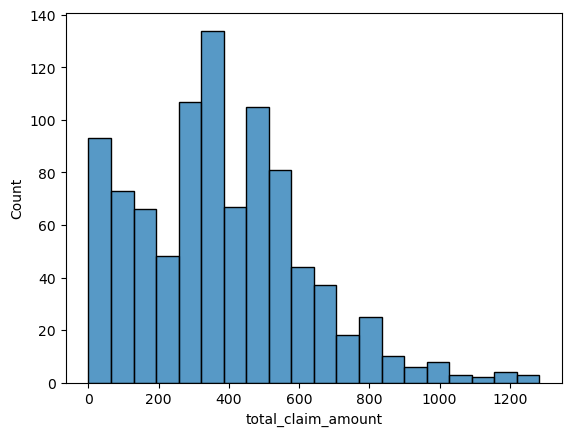

In [540]:
#from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(numerical_value.iloc[:,0])
plt.show()
sns.histplot(numerical_value.iloc[:,1])
plt.show()
sns.histplot(numerical_value.iloc[:,2])
plt.show()
sns.histplot(numerical_value.iloc[:,3])
plt.show()
sns.histplot(numerical_value.iloc[:,4])
plt.show()

C:\Users\benja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


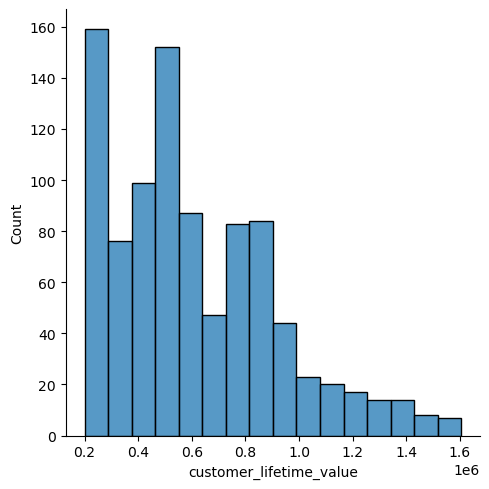

C:\Users\benja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


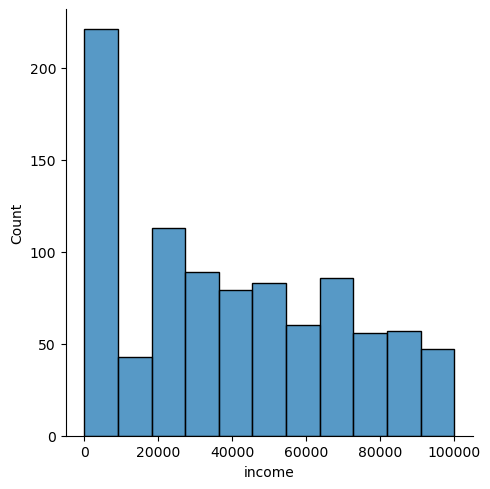

C:\Users\benja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


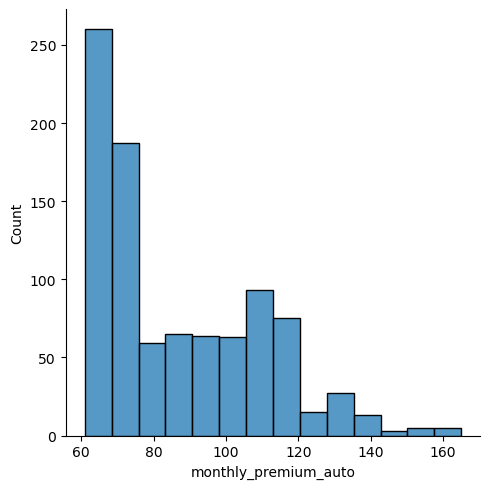

C:\Users\benja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


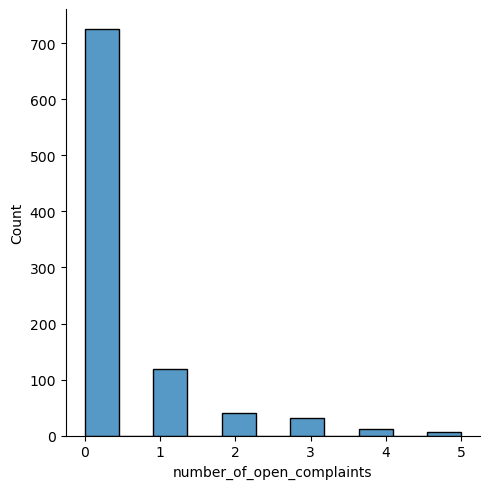

C:\Users\benja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


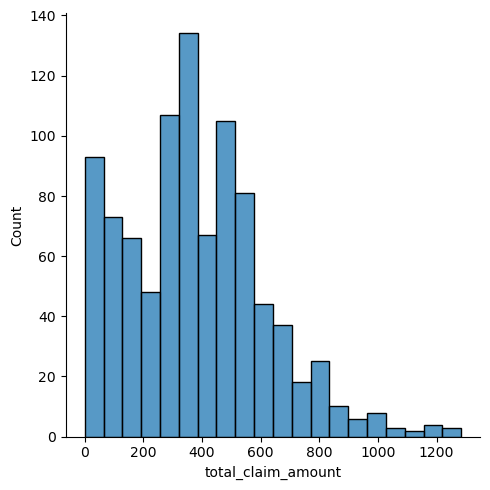

In [541]:
sns.displot(numerical_value, x=numerical_value.iloc[:,0])
plt.show()
sns.displot(numerical_value, x=numerical_value.iloc[:,1])
plt.show()
sns.displot(numerical_value, x=numerical_value.iloc[:,2])
plt.show()
sns.displot(numerical_value, x=numerical_value.iloc[:,3])
plt.show()
sns.displot(numerical_value, x=numerical_value.iloc[:,4])
plt.show()

In [542]:
#for the graphs - i will do it the ugly way but i promise myself to try the nice function Jan showed us today 

In [543]:
#ANSWER TO THE QUESTION:no standard distribution was found

In [544]:
numerical_value.iloc[:,2].describe()
#monthly_premium_auto it has extremely wide range

count    934.000000
mean      86.844754
std       22.681694
min       61.000000
25%       68.000000
50%       78.000000
75%      106.000000
max      165.000000
Name: monthly_premium_auto, dtype: float64

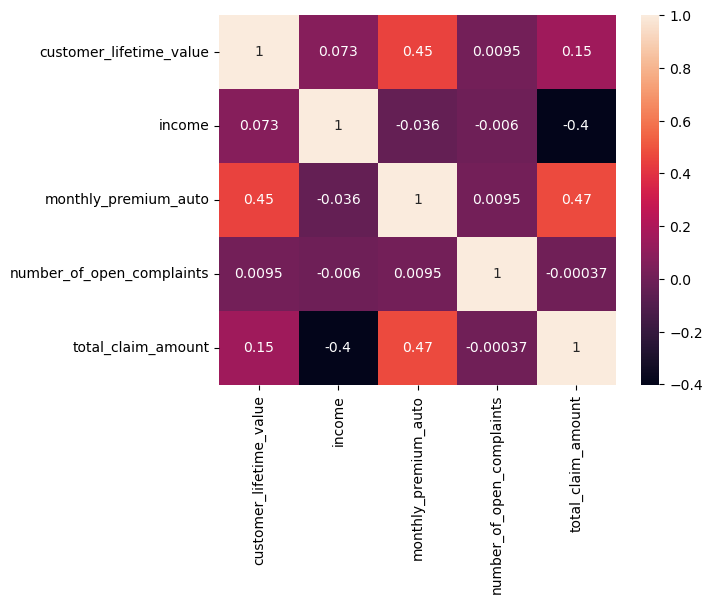

In [545]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

correlations_matrix = numerical_value.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [546]:
y = numerical_value['total_claim_amount']
X = numerical_value.drop(['total_claim_amount'], axis=1)
lm = linear_model.LinearRegression()
lm.fit(X,y)
print(lm.score(X,y))
y_pred=lm.predict(X)
print(mean_squared_error(y_pred,y))

0.3701812564325643
35683.54677363658


In [547]:
#score is too low ! It was improved from 0.34 after removing outliers in customer_lifetime_value and monthly_premium_auto

In [548]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
transformer = MinMaxScaler().fit(X)
x_standardized = transformer.transform(X)
results = pd.DataFrame(x_standardized, columns=X.columns)
results

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,0.354339,0.000000,0.317308,0.0
1,0.775106,0.487865,0.451923,0.0
2,0.401795,0.000000,0.432692,0.0
3,0.239213,0.363715,0.067308,0.0
4,0.445271,0.629272,0.076923,0.0
...,...,...,...,...
929,0.059677,0.694448,0.115385,0.2
930,0.075153,0.386595,0.163462,0.2
931,0.087942,0.160674,0.259615,0.0
932,0.186774,0.795188,0.509615,0.0


In [549]:
X_cat_nom = categorical_value.drop(['education'], axis=1)
X_cat_ord = categorical_value[['education']] #data frames have attributes therefore can be encoded or labeled

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['F', 'M', 'NG'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Four-Door Car', 'Luxury', 'SUV', 'Two-Door Car'], dtype=object)]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]]


<Axes: >

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,gender_F,gender_NG,policy_type_Corporate Auto,policy_type_Special Auto,vehicle_class_Four-Door Car,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
930,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
931,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
932,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


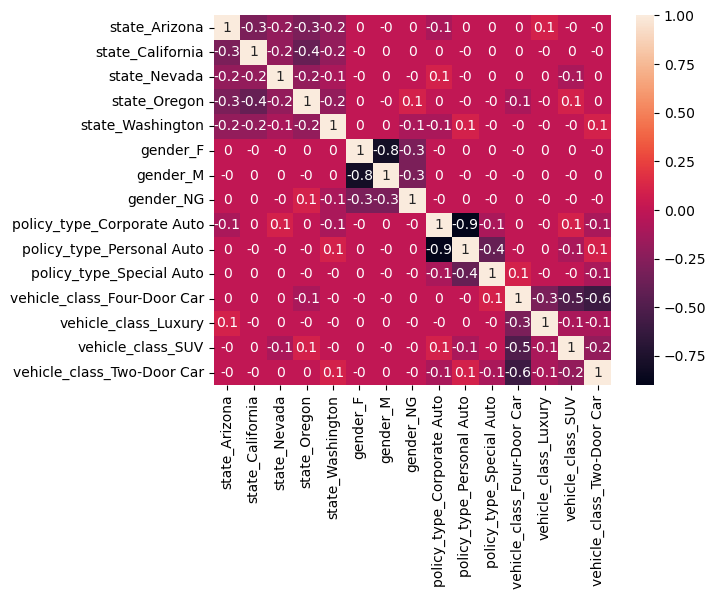

In [550]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_cat_nom)
column_name_nom = encoder.get_feature_names_out(X_cat_nom.columns)
print(encoder.categories_)
encoded = encoder.transform(X_cat_nom).toarray()
print(encoded)
onehot_encoded = pd.DataFrame(encoded,columns=column_name_nom)
#the columns are going to be alll the features 
display(sns.heatmap(onehot_encoded.corr().round(1), annot=True))
#drop method is added after teh first review to try to get a better score
onehot_encoded = onehot_encoded.drop(columns=['gender_M','policy_type_Personal Auto'], axis=1)
onehot_encoded

In [551]:
from sklearn.preprocessing import LabelEncoder
label_encoded = LabelEncoder().fit(X_cat_ord).transform(X_cat_ord)
label_encoded
label_encoded = pd.DataFrame(label_encoded,columns=X_cat_ord.columns)#option 2 for 'Series' object has no attribute 'columns' setting directly the column that i want to attribute
display(label_encoded.head())
label_encoded['education'].value_counts()

C:\Users\benja\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\benja\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,education
0,0
1,0
2,0
3,3
4,0


education
0    290
1    269
3    260
4     84
2     31
Name: count, dtype: int64

In [597]:
X_2 = pd.concat([results, onehot_encoded], axis=1)# np.concatenate()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.5)


In [598]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(467, 17)
(467, 17)
(467,)
(467,)


In [599]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [600]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.4375053505977309

In [601]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.3771525391321854

In [578]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
print(mse)
print(y_test.mean())
print(rmse/y_test.mean())

from sklearn.metrics import mean_absolute_error, r2_score
import math
mae = mean_absolute_error(y_test, predictions_test)
print(mae)
rmse = math.sqrt(mse)
print(rmse)
#print(lm.score(X_test, y_test))
r2 = r2_score(y_test, predictions_test)
print(r2)

37080.51341335181
377.74242502141334
0.48379659576975276
150.1838958287229
192.56301153999385
0.3650686000105592


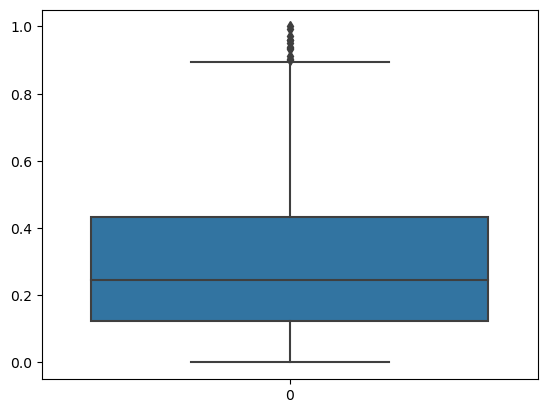

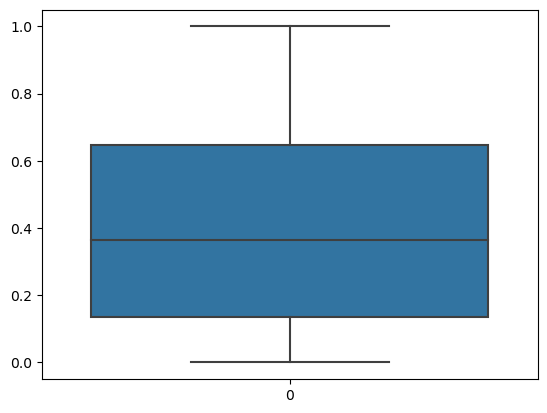

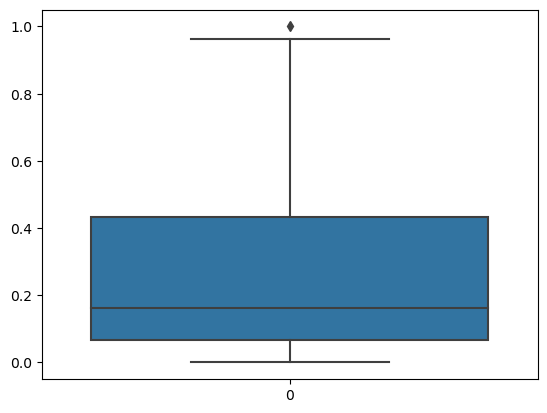

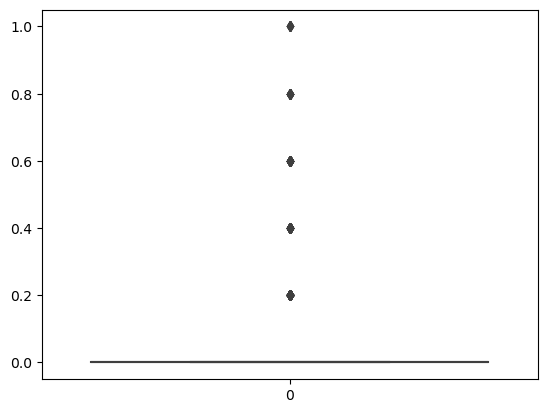

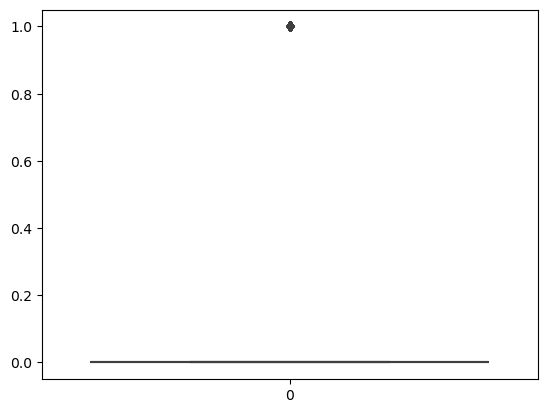

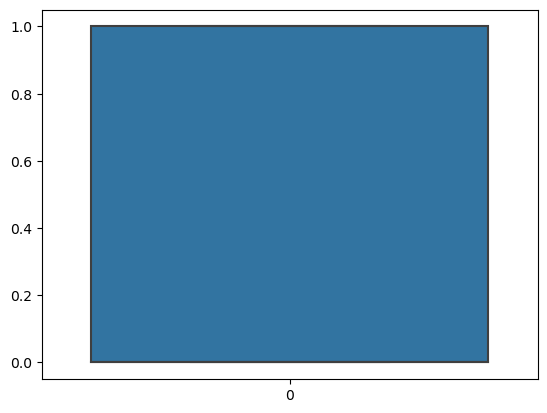

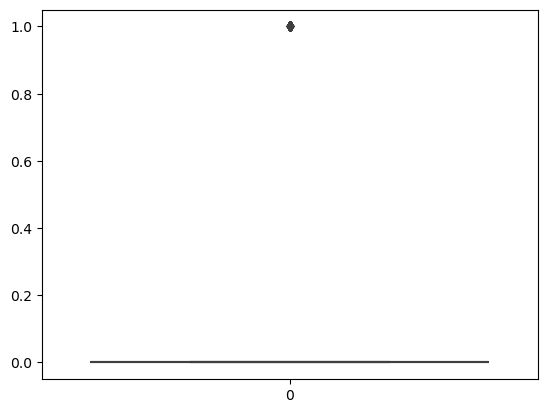

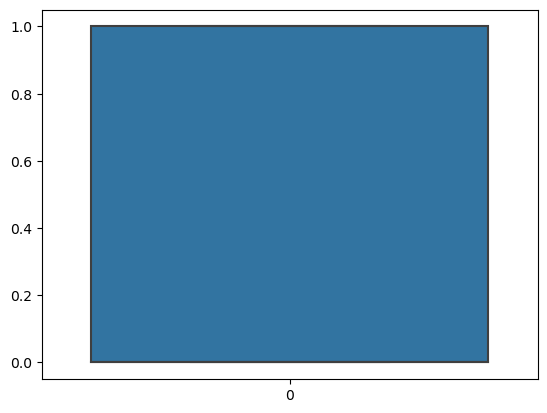

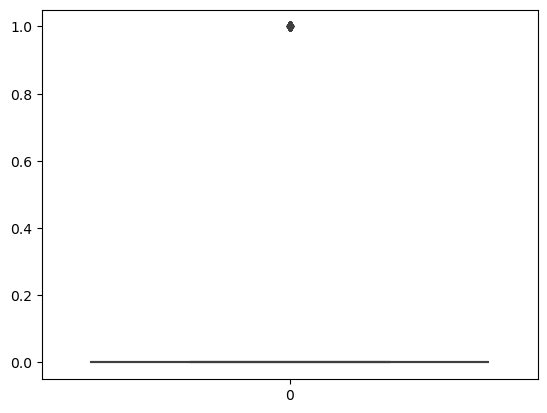

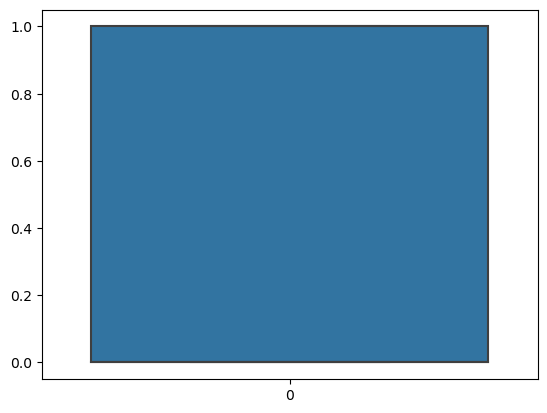

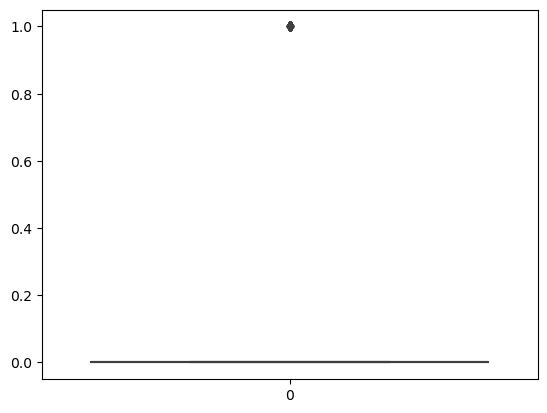

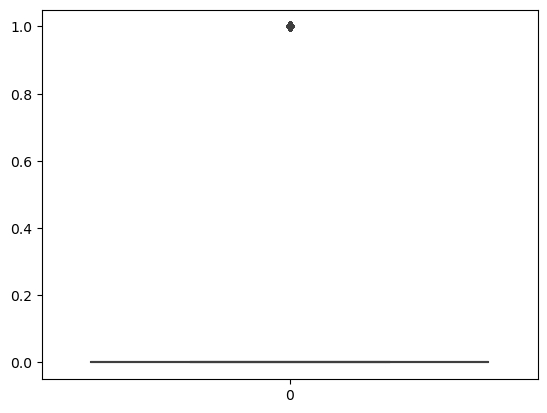

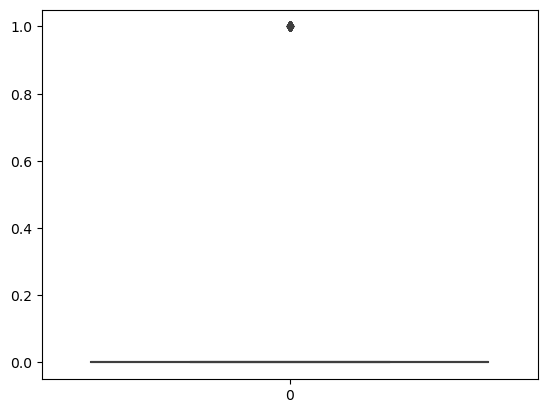

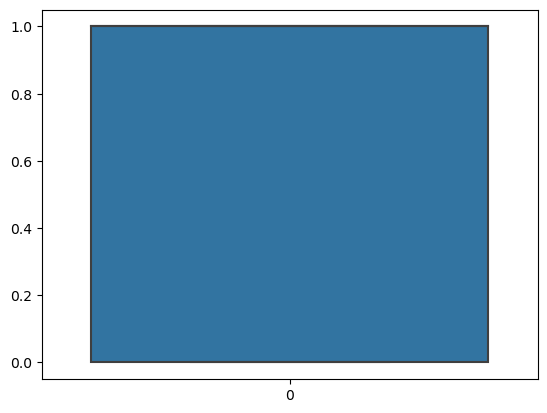

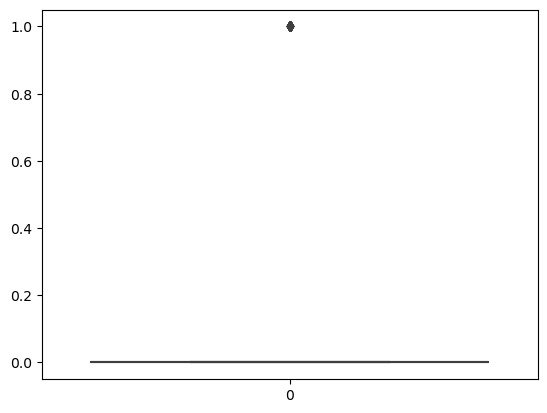

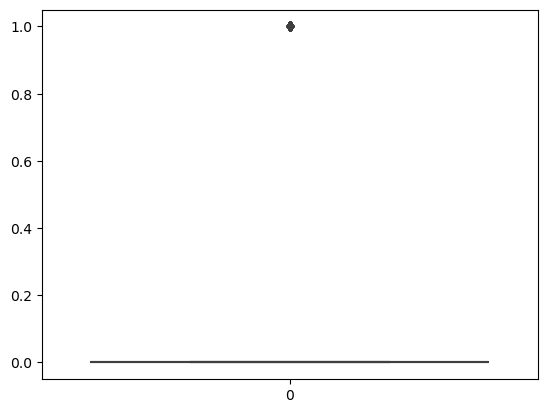

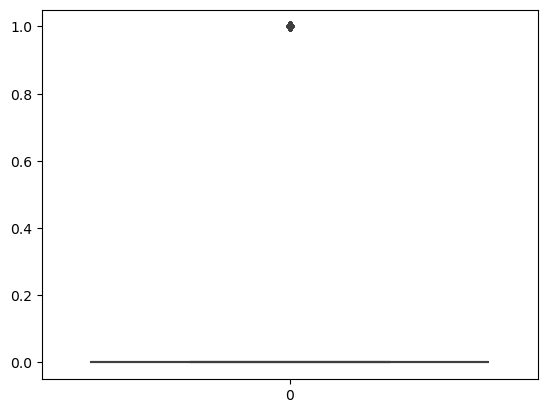

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints', 'state_Arizona', 'state_California',
       'state_Nevada', 'state_Oregon', 'state_Washington', 'gender_F',
       'gender_NG', 'policy_type_Corporate Auto', 'policy_type_Special Auto',
       'vehicle_class_Four-Door Car', 'vehicle_class_Luxury',
       'vehicle_class_SUV', 'vehicle_class_Two-Door Car'],
      dtype='object')


In [579]:
for i in range(len(X_2.columns)):
    sns.boxplot(X_2.iloc[:,i])
    plt.show()
print(X_2.columns)


<Axes: >

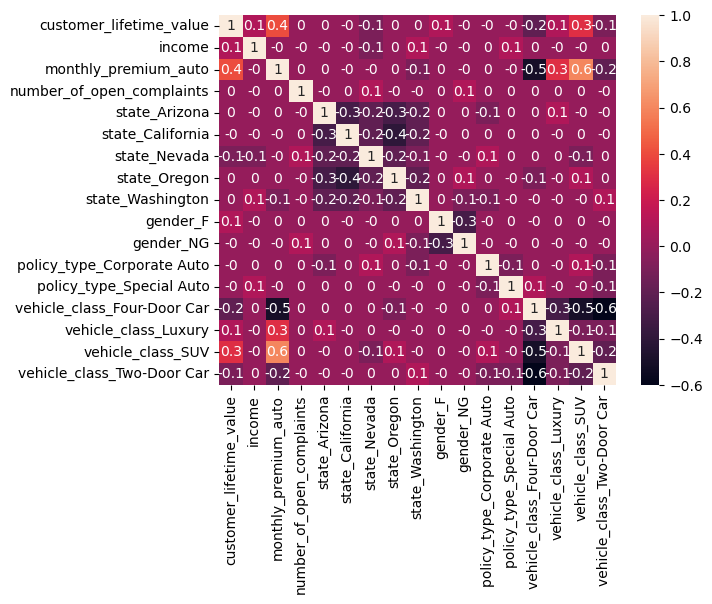

In [580]:
sns.heatmap(X_2.corr().round(1), annot=True)

In [581]:
#after watching these two (boxplots and correlation matrix)  I decided to remove outliers from customer_lifetime_value, monthly_premium_auto, and remove hihgly correlated variables like gender_M and policy_type_personal auto.
#i tried adding more samples for test but no significant differences appeared
#note: higher the samples for testing and lower is the result

<Axes: >

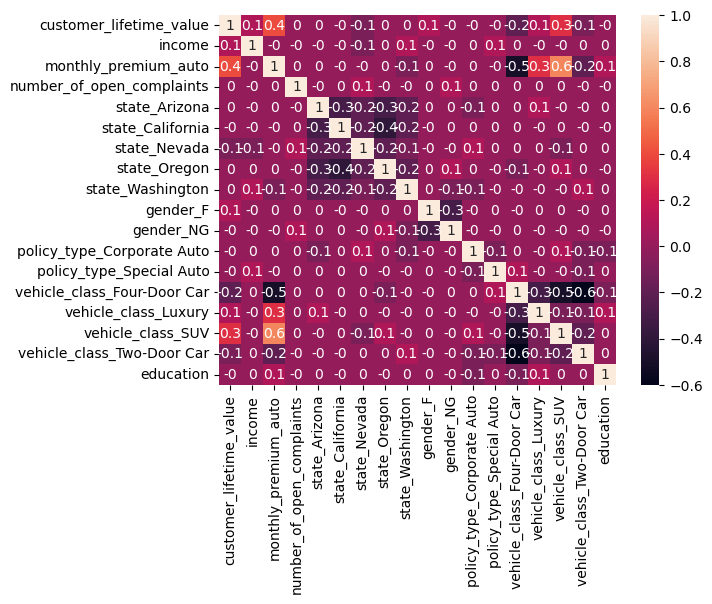

In [582]:
sns.heatmap(X_3.corr().round(1), annot=True)

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
predictions = lm.predict(X_train)
print(r2_score(y_train, predictions))

(467, 18)
(467, 18)
(467,)
(467,)
0.4042352448048653


In [593]:
#this time i'm going to be more drastical
results2 = results.drop(columns=['number_of_open_complaints'],axis=1)
onehot_encoded2 = onehot_encoded.drop(columns=['policy_type_Special Auto','policy_type_Corporate Auto'],axis=1)
X_4 = pd.concat([results2, onehot_encoded2], axis=1)# concatenate without education (labeled) and the columns dropped above
X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
lm.fit(X_train,y_train)
predictions = lm.predict(X_train)
print(r2_score(y_train, predictions))
predictions_test = lm.predict(X_test)
print(r2_score(y_test, predictions_test))
#incredible for me I got worse results
#I would like to try another method. I will create three clusters, based on state, gender and vehicle class, in all of them customer_lifetime_value and monthly_premium_auto are going to be.  


(467, 14)
(467, 14)
(467,)
(467,)
0.4131614647534755
0.4000624047110508


In [594]:
onehotenc_Cl1 =onehot_encoded.drop(columns=['gender_F', 'gender_NG','vehicle_class_Four-Door Car', 'vehicle_class_Luxury', 'vehicle_class_SUV', 'vehicle_class_Two-Door Car'], axis=1)
onehotenc_Cl2 =onehot_encoded.drop(columns=['state_Arizona', 'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington','vehicle_class_Four-Door Car', 'vehicle_class_Luxury', 'vehicle_class_SUV', 'vehicle_class_Two-Door Car'], axis=1)
onehotenc_Cl3 =onehot_encoded.drop(columns=['state_Arizona', 'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington', 'gender_F', 'gender_NG'], axis=1)
Cl1_state = pd.concat([results2, onehotenc_Cl1 ], axis=1)
Cl2_gender = pd.concat([results2, onehotenc_Cl2 ], axis=1)
Cl3_vehicle = pd.concat([results2, onehotenc_Cl3], axis=1)

#let's train the first cluster:
X_train, X_test, y_train, y_test = train_test_split(Cl1_state, y, test_size=0.5)#let's keep it in 0.2
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
lm.fit(X_train,y_train)
predictions = lm.predict(X_train)
print(r2_score(y_train, predictions))
predictions_test = lm.predict(X_test)
print(r2_score(y_test, predictions_test))


(467, 10)
(467, 10)
(467,)
(467,)
0.42224023590556237
0.38744961030039893


In [595]:
#let's train the second cluster:
X_train, X_test, y_train, y_test = train_test_split(Cl2_gender, y, test_size=0.5)#let's keep it in 0.2
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
lm.fit(X_train,y_train)
predictions = lm.predict(X_train)
print(r2_score(y_train, predictions))
predictions_test = lm.predict(X_test)
print(r2_score(y_test, predictions_test))

(467, 7)
(467, 7)
(467,)
(467,)
0.37354019865737276
0.3639467841051377


In [596]:
#let's train the third cluster:
X_train, X_test, y_train, y_test = train_test_split(Cl3_vehicle, y, test_size=0.5)#let's keep it in 0.2
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
lm.fit(X_train,y_train)
predictions = lm.predict(X_train)
print(r2_score(y_train, predictions))
predictions_test = lm.predict(X_test)
print(r2_score(y_test, predictions_test))

(467, 9)
(467, 9)
(467,)
(467,)
0.3937553444911178
0.34283257839990644


In [572]:
#after trying different methods to increase my score I'm gettting a number around 37-44 